# Please excuse the mess!

# I haven't properly started working on this notebook


### The general idea
The general idea is to be able to express failure parameters in terms of really inuitive concepts like 
- mean time to failure (or expected lifespan -- e.g., 50 years)
- min wind speed (where failure rates start to increase)
- max wind speed (where failure is basically guaranteed)

I would then generate the less-intuitive failure parameters based on these metrics.

### Things to revisit

To use or not to use the log link function...
- **Pros:** Conventional for GLM models of Poisson processes -- guarantees that failure rates aren't negative. 
- **Cons:** This step feels more complicated than it needs to be.
- **Alternative:** Specify non-negative hyperpriors (means I can't use a normal distribution)
    
Reasonable assumptions for equipment lifetime

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
time_to_failure = 50 # years

In [3]:
lam = 1./(time_to_failure*8760)

In [4]:
lam

2.2831050228310503e-06

In [5]:
np.log(lam)

-12.989974189358582

In [56]:
wind_low = 20
wind_high = 100

time_low = 50
time_high = 1./8760

lam_low = 1./(time_low*8760)
lam_high = 1./(time_high*8760)

b = np.log(lam_low)
a = (1./np.log(wind_high-wind_low))*np.log(lam_high/lam_low)

In [57]:
wind = np.linspace(0,110)
lam = np.exp(a*np.log(pd.Series(wind-wind_low).where(wind>wind_low,0))+b)

/Users/laureldunn/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


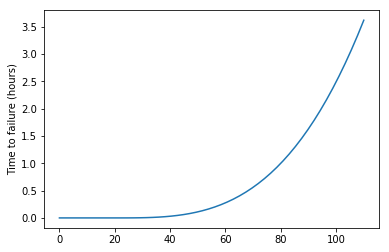

In [59]:
fig, ax = plt.subplots()
ax.plot(wind, lam)
ax.set_ylabel('Time to failure (hours)')
plt.show()